Question 8 - My student number is 500829795 but there is no number 5, so I choose the second last number which is 9, according to the appendix this is face and hands


TRY:
- remove bad images
- grid search learning rate for filters 128.64.32 and 64.32.16 or try increasing 16 32 64 or 32 64 128
- dropout rate between 0.5 and 0.8 increasing by 0.1
- add back the L2 and increase that as well if above doesnt work

- convert images to greyscale and check that too

In [ ]:
# mount the google drive folder

# I could not get the files to download the images into one file, so I have a folder called samefacesandhands with
# two folders in them called faces and hands
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#imports

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#create the dataset
#generate dataset and reshape to 50x50
#batch_size=32
img_height=50
img_width=50

train_ds=tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/DeepLearning/samefaceandhands',
  labels='inferred',
  label_mode='binary',
  validation_split=0.3,
  subset="training",
  seed=333,
  image_size=(50,50),
  batch_size=32

)

#the validation is basically the test set -- I have it as 10% rn, maybe make it more later as needed
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/DeepLearning/samefaceandhands',
  labels='inferred',
  label_mode='binary',
  validation_split=0.3,
  subset="validation",
  seed=333,
  image_size=(50,50),
  batch_size=32
)

Found 297 files belonging to 2 classes.
Using 208 files for training.
Found 297 files belonging to 2 classes.
Using 89 files for validation.


In [ ]:
from pathlib import Path
import imghdr

data_dir = "/content/drive/MyDrive/DeepLearning/samefaceandhands/hands"
image_extensions = [".png", ".jpg",".jpeg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [ ]:
from pathlib import Path
import imghdr

data_dir = "/content/drive/MyDrive/DeepLearning/samefaceandhands/faces"
image_extensions = [".png", ".jpg",".jpeg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [ ]:

from PIL import Image
import os

path = "/content/drive/MyDrive/DeepLearning/samefaceandhands/hands"

for file in os.listdir(path):
    if file.endswith(".jpg"):
        img = Image.open(file)
        file_name, file_ext = os.path.splitext(file)
        img.save('/jpeg/{}.jpeg'.format(file_name))f


In [ ]:
import os
import cv2
import imghdr

def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:
                f_path=os.path.join (klass_path,f)
                tip = imghdr.what(f_path)
                if ext_list.count(tip) == 0:
                  bad_images.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir ='/content/drive/MyDrive/DeepLearning/samefaceandhands/hands'
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  Hand_Model.jpg
*** WARNING*** you have files in  /content/drive/MyDrive/DeepLearning/samefaceandhands/hands  it should only contain sub directories
processing class directory  1583265680068-ARC_Shutterstock_197848742_Two_hands_reaching_for_each_other_isolated_on_black_VICE_RF.jpeg
*** WARNING*** you have files in  /content/drive/MyDrive/DeepLearning/samefaceandhands/hands  it should only contain sub directories
processing class directory  handshake-shutterstock_241319689-2000w.jpg
*** WARNING*** you have files in  /content/drive/MyDrive/DeepLearning/samefaceandhands/hands  it should only contain sub directories
processing class directory  handcare-advice-hand-model-1650047832.jpg
*** WARNING*** you have files in  /content/drive/MyDrive/DeepLearning/samefaceandhands/hands  it should only contain sub directories
processing class directory  couple-holding-hands-with-a-pinky-grip-royalty-free-image-1692048016.jpg
*** WARNING*** you have files in  /content/drive/

In [ ]:
class_names = train_ds.class_names
print(class_names)

['faces', 'hands']


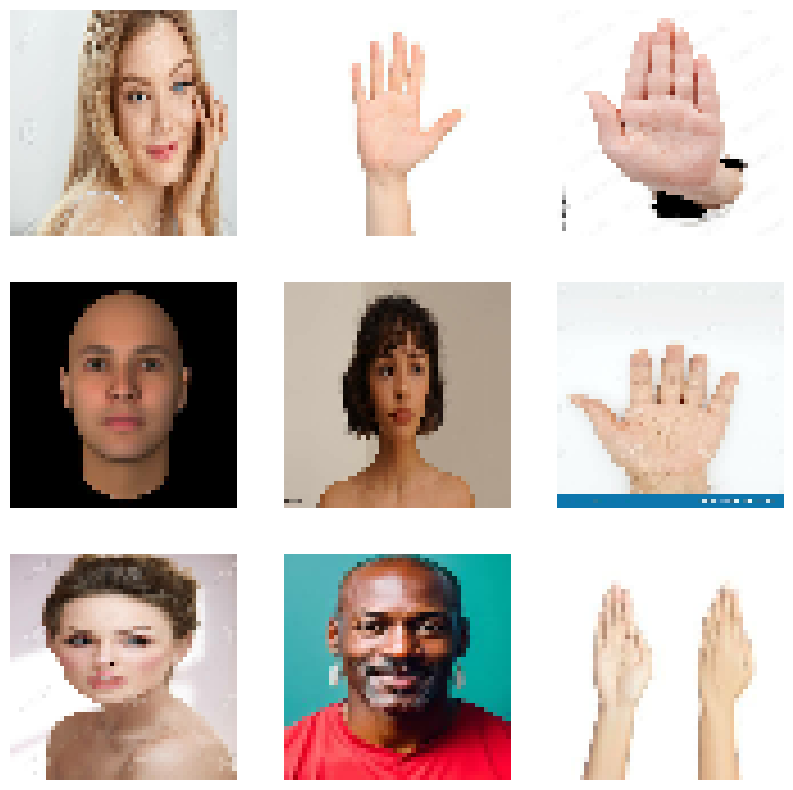

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
# configure data for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Epoch 1/40
7/7 [==============================] - 17s 2s/step - loss: 4.6646 - accuracy: 0.5240 - val_loss: 3.9685 - val_accuracy: 0.4944
Epoch 2/40
7/7 [==============================] - 2s 316ms/step - loss: 3.5674 - accuracy: 0.5529 - val_loss: 3.0613 - val_accuracy: 0.4944
Epoch 3/40
7/7 [==============================] - 2s 364ms/step - loss: 2.7474 - accuracy: 0.5529 - val_loss: 2.3677 - val_accuracy: 0.4944
Epoch 4/40
7/7 [==============================] - 4s 547ms/step - loss: 2.1334 - accuracy: 0.5481 - val_loss: 1.8689 - val_accuracy: 0.5056
Epoch 5/40
7/7 [==============================] - 3s 483ms/step - loss: 1.6923 - accuracy: 0.5865 - val_loss: 1.4999 - val_accuracy: 0.5618
Epoch 6/40
7/7 [==============================] - 2s 309ms/step - loss: 1.3815 - accuracy: 0.6490 - val_loss: 1.2198 - val_accuracy: 0.7303
Epoch 7/40
7/7 [==============================] - 2s 293ms/step - loss: 1.1442 - accuracy: 0.6731 - val_loss: 1.0243 - val_accuracy: 0.8539
Epoch 8/40
7/7 [======

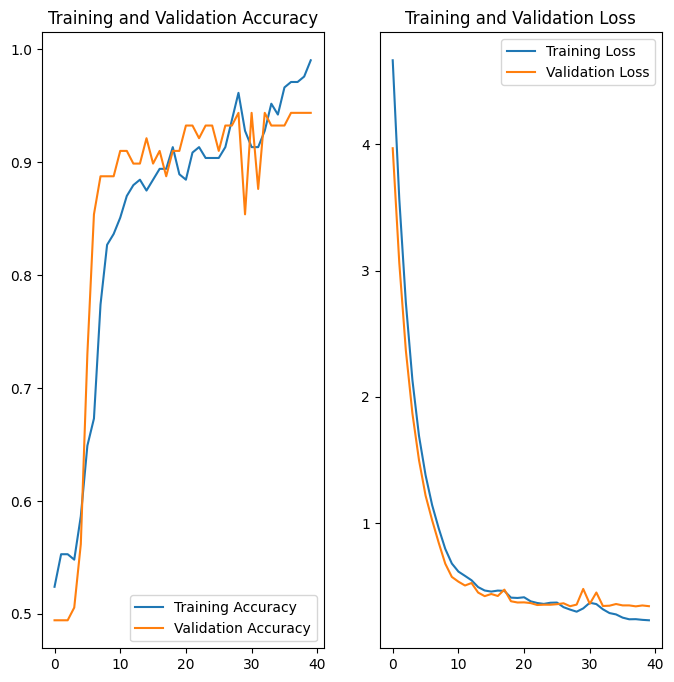

In [ ]:
#build cnn model
#build cnn model
i=1
import numpy as np
#filters=[[64,32,16,8],[128,64,32,16],[32,64,128,256],[16,32,64,128],[64,64,128,128],[128,128,64,64,]]
#for drop in np.arange(0.5,1.0,0.1):
#  for f in range(6):
#    for lamb in np.arange(0.01,0.1,0.01):
#      print(i)
#      i=i+1
#      #filters
#      print(filters[f])
#      #dropout
#      print(drop)
#      #lamda for regularization
#      print(lamb)


filters=[128,64,32,16]
drop=0.6
lamb=0.03

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(filters[0], 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(filters[1], 3, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(lamb)),
  #tf.keras.layers.Conv2D(filters[1], 3, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(lamb)),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(filters[2], 3, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(lamb)),
  #tf.keras.layers.Conv2D(filters[2], 3, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(lamb)),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(filters[3], 3, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(lamb)),
  #tf.keras.layers.Conv2D(filters[2], 3, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(lamb)),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dropout(drop),
  tf.keras.layers.Dense(1,activation='sigmoid')
])



#compile the model - binarycrossentropy

model.compile(
optimizer='adam',
loss=tf.keras.losses.binary_crossentropy,
metrics=['accuracy'])



history=model.fit(
train_ds,
validation_data=val_ds,
epochs=40
)
# Training Results
epochs=40
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 50, 50, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          1

In [ ]:
layer_outputs = [layer.output for layer in model.layers[1:]]
peek_at_layers = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)


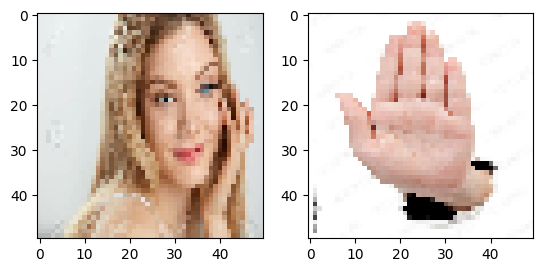

In [ ]:
#Display two images and see the images developed at the output of each layer
x=images[0].numpy().astype("uint8")
x = x.reshape(1,50,50,3)

y=images[2].numpy().astype("uint8")
y = y.reshape(1,50,50,3)

plt.subplot(1,2,1)
plt.imshow(images[0].numpy().astype("uint8"))

plt.subplot(1,2,2)
plt.imshow(images[2].numpy().astype("uint8"))



In [ ]:
#layer outputs of x -- face
myLayers_face = peek_at_layers.predict(x)

#layer outputs of y -- hand
myLayers_hands = peek_at_layers.predict(y)

1/1 [==============================] - 0s 34ms/step


In [ ]:
print(len(myLayers_face))
print(len(myLayers_hands))

12
12


In [ ]:
for i in range(12):
  x = myLayers_face[i]
  print(i)
  print(x.shape)

for i in range(12):
  y = myLayers_hands[i]
  print(i)
  print(y.shape)

0
(1, 48, 48, 128)
1
(1, 24, 24, 128)
2
(1, 22, 22, 64)
3
(1, 11, 11, 64)
4
(1, 9, 9, 32)
5
(1, 4, 4, 32)
6
(1, 2, 2, 16)
7
(1, 1, 1, 16)
8
(1, 16)
9
(1, 1000)
10
(1, 1000)
11
(1, 1)
0
(1, 48, 48, 128)
1
(1, 24, 24, 128)
2
(1, 22, 22, 64)
3
(1, 11, 11, 64)
4
(1, 9, 9, 32)
5
(1, 4, 4, 32)
6
(1, 2, 2, 16)
7
(1, 1, 1, 16)
8
(1, 16)
9
(1, 1000)
10
(1, 1000)
11
(1, 1)


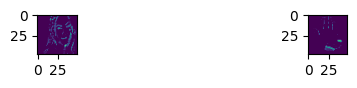

In [ ]:

x = myLayers_face[0][0][:,:,1]
y = myLayers_hands[0][0][:,:,1]
plt.subplot(8,2,1)
plt.imshow(x)
plt.subplot(8,2,2)
plt.imshow(y)


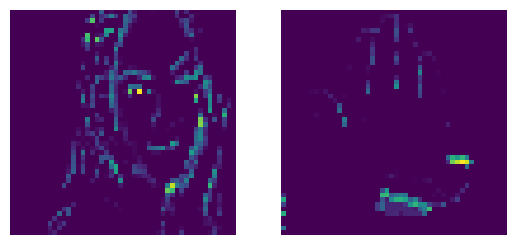

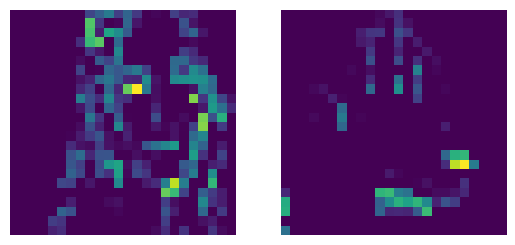

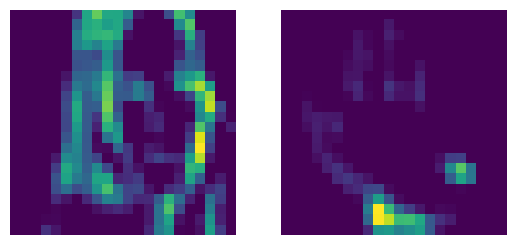

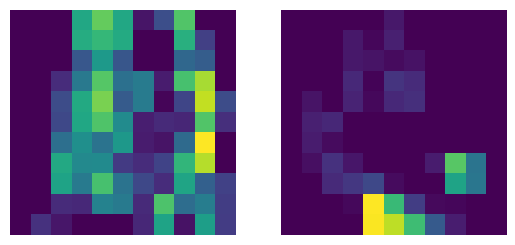

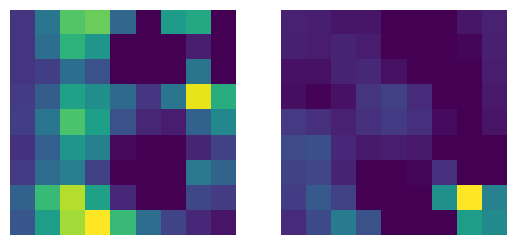

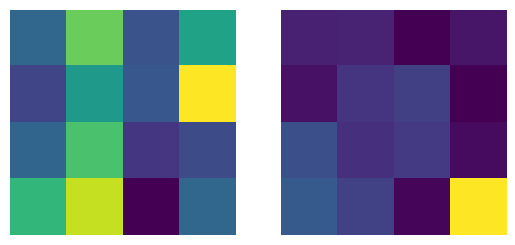

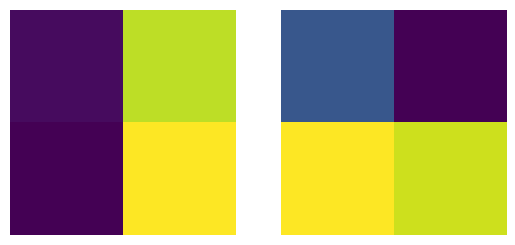

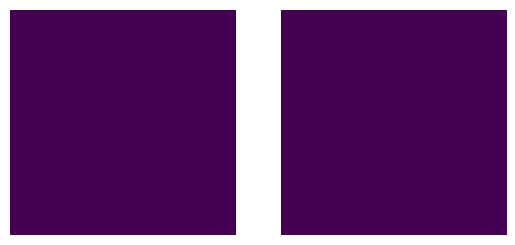

In [ ]:
x = myLayers_face[0][0][:,:,1]
y = myLayers_hands[0][0][:,:,1]

x1 = myLayers_face[1][0][:,:,1]
y1 = myLayers_hands[1][0][:,:,1]

x2 = myLayers_face[2][0][:,:,1]
y2 = myLayers_hands[2][0][:,:,1]

x3 = myLayers_face[3][0][:,:,1]
y3 = myLayers_hands[3][0][:,:,1]

x4 = myLayers_face[4][0][:,:,1]
y4 = myLayers_hands[4][0][:,:,1]

x5 = myLayers_face[5][0][:,:,1]
y5 = myLayers_hands[5][0][:,:,1]

x6 = myLayers_face[6][0][:,:,1]
y6 = myLayers_hands[6][0][:,:,1]

x7 = myLayers_face[7][0][:,:,1]
y7 = myLayers_hands[7][0][:,:,1]


fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].axis('off')
ax[0].imshow(x)
ax[1].axis('off')
ax[1].imshow(y)

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].axis('off')
ax[0].imshow(x1)
ax[1].axis('off')
ax[1].imshow(y1)

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].axis('off')
ax[0].imshow(x2)
ax[1].axis('off')
ax[1].imshow(y2)

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].axis('off')
ax[0].imshow(x3)
ax[1].axis('off')
ax[1].imshow(y3)

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].axis('off')
ax[0].imshow(x4)
ax[1].axis('off')
ax[1].imshow(y4)

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].axis('off')
ax[0].imshow(x5)
ax[1].axis('off')
ax[1].imshow(y5)

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].axis('off')
ax[0].imshow(x6)
ax[1].axis('off')
ax[1].imshow(y6)

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].axis('off')
ax[0].imshow(x7)
ax[1].axis('off')
ax[1].imshow(y7)